In [12]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import Normalize, ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from fuzzywuzzy import process

In [13]:
df_school_yr_1 = pd.read_csv("PEN_July_1_2021_June_30_2022.csv", sep=",")
df_school_yr_2 = pd.read_csv("PEN_July_1_2022_December_31_2022.csv", sep=",")
books = df_school_yr_1.append(df_school_yr_2)

florida_books = books.loc[books["State"] == "Florida"]
florida_district_count = florida_books.groupby(by="District")["Title"].count().reset_index()

florida_district_count

# Manually combine districts that repeat
florida_district_count.to_csv("tmp_florda_map_file.csv")

<ipython-input-13-f9796c835987>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = df_school_yr_1.append(df_school_yr_2)


In [17]:
final_books = pd.read_csv("florida_school_dist_map/cleaned_florida_schools.csv")
final_books["District"] = final_books["District"].str.lower()
final_books

,Unnamed: 0,District,Title
0,0,brevard,53
1,2,broward,16
2,3,clay,65
3,5,duval,176
4,6,escambia,145
5,7,flagler,17
6,18,hernando,18
7,11,highlands,17
8,12,indian river,161
9,13,jackson,14


In [22]:
shapefile_path = "florida_school_dist_map/Florida_Counties_w_Shoreline_(12k).shp"
gdf = gpd.read_file(shapefile_path)
gdf["NAME"] = gdf["NAME"].str.lower()
gdf["NAME"].unique()

array(['monroe', 'pinellas', 'manatee', 'hillsborough', 'sarasota',
       'charlotte', 'lee', 'polk', 'de soto', 'hardee', 'collier',
       'osceola', 'hendry', 'glades', 'highlands', 'okeechobee', 'dade',
       'broward', 'indian river', 'hernando', 'alachua', 'marion',
       'baker', 'bradford', 'sumter', 'putnam', 'clay', 'duval', 'nassau',
       'lake', 'orange', 'st. johns', 'volusia', 'flagler', 'seminole',
       'brevard', 'palm beach', 'calhoun', 'franklin', 'liberty',
       'gadsden', 'wakulla', 'leon', 'jefferson', 'taylor', 'madison',
       'dixie', 'lafayette', 'hamilton', 'levy', 'suwannee', 'gilchrist',
       'pasco', 'citrus', 'columbia', 'union', 'escambia', 'santa rosa',
       'okaloosa', 'walton', 'bay', 'washington', 'holmes', 'jackson',
       'martin', 'st. lucie', 'gulf'], dtype=object)

In [24]:
final_map_df = pd.merge(gdf, final_books, left_on='NAME', right_on='District', how='left')
final_map_df["Title"] = final_map_df["Title"].fillna(0)

final_map_df

,OBJECTID,NAME,DEP_COUNTY,FIPS_COUNT,WATER,SHAPE__Are,SHAPE__Len,geometry,Unnamed: 0,District,Title
0,1,monroe,44,87,0,3.146134e+09,7.627012e+06,"MULTIPOLYGON (((-81.03516 25.50039, -81.03590 ...",NaN,NaN,0.0
1,2,pinellas,52,103,0,9.359117e+08,1.515526e+06,"MULTIPOLYGON (((-82.73121 27.75030, -82.73155 ...",19.0,pinellas,1.0
2,3,manatee,41,81,0,2.473555e+09,1.110249e+06,"MULTIPOLYGON (((-82.68963 27.46897, -82.68963 ...",23.0,manatee,31.0
3,4,hillsborough,29,57,0,3.550270e+09,1.436334e+06,"MULTIPOLYGON (((-82.15578 28.17181, -82.15489 ...",NaN,NaN,0.0
4,5,sarasota,58,115,0,1.883732e+09,9.351623e+05,"MULTIPOLYGON (((-82.35095 27.38655, -82.33459 ...",22.0,sarasota,3.0
...,...,...,...,...,...,...,...,...,...,...,...
63,63,holmes,30,59,0,1.725559e+09,2.088535e+05,"POLYGON ((-85.49993 30.99695, -85.49993 30.994...",NaN,NaN,0.0
64,64,jackson,32,63,0,3.357296e+09,2.641635e+05,"POLYGON ((-85.49993 30.99695, -85.49664 30.996...",13.0,jackson,14.0
65,66,martin,43,85,0,1.821162e+09,8.126517e+05,"MULTIPOLYGON (((-80.28545 27.21063, -80.28512 ...",NaN,NaN,0.0
66,67,st. lucie,56,111,0,1.887975e+09,6.555225e+05,"MULTIPOLYGON (((-80.29299 27.24199, -80.29291 ...",26.0,st. lucie,23.0


In [25]:
final_map_df["Title"].unique()

array([  0.,   1.,  31.,   3.,  30.,  16.,   5.,  17., 161.,  18.,  65.,
       176.,   9.,   4.,   6.,   7.,  11.,  53.,  25., 145.,  58.,  14.,
        23.])

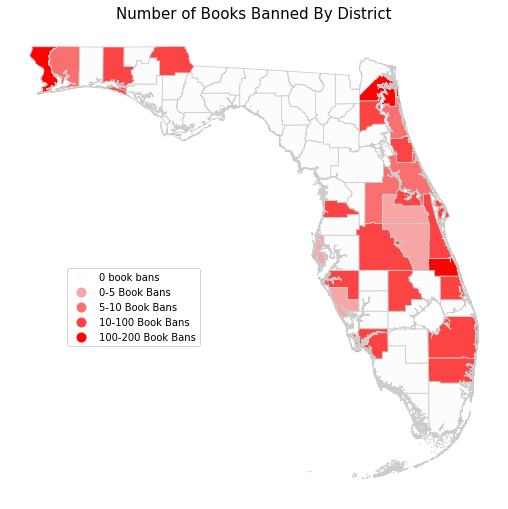

In [29]:
bins = [-1, 0, 5, 10, 100, 200]  # Adjust the bin edges as needed
labels = ["0 book bans", '0-5 Book Bans', '5-10 Book Bans', '10-100 Book Bans', '100-200 Book Bans']

# Create a new categorical column based on the bin edges and labels
final_map_df['Category'] = pd.cut(final_map_df['Title'], bins=bins, labels=labels, include_lowest=True)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)

# Define color map and normalization
custom_colors = ['#fcfcfc', '#f7a6a6', '#fa7070', '#fc4444', '#ff0303']  # Adjust colors as needed
# Create a ListedColormap using the custom colors
cmap = ListedColormap(custom_colors)
norm = Normalize(vmin=0, vmax=len(labels)-1)

# Plot the map
final_map_df.plot(column='Category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
ax.set_title('Number of Books Banned By District', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Adjust the legend position using the 'bbox_to_anchor' parameter
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.4, 0.5))  # Adjust coordinates as needed

# Show the plot
plt.show()